# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# **Final Evaluation of the model**

In [2]:
def knn_model(x_train,y_train,x_test,y_test,k):
  #This function applies final evaluation for the model on test set
  model = KNeighborsClassifier(n_neighbors=k)
  start = time.time()
  model.fit(x_train, y_train)
  end = time.time()
  train_time = end - start
  start = time.time()
  y_pred = model.predict(x_test)
  end = time.time()
  prediction_time = end - start
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_pred, y_test)
  precision=precision_score(y_pred,y_test,average='macro')
  print("-----------------------------------------------------")
  print("For Optimim k:{}, Final Evaluation Report on test set".format(k))
  print("Confusion Matrix: {}".format(cm))
  print("Accuracy: {}".format(accuracy))
  print("Precision: {}".format(precision))
  print("Training Time: {}".format(train_time))
  print("Prediction Time: {}".format(prediction_time))
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
  #Visulise the predictions
  for ax, image, prediction in zip(axes, x_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


  











  

# **Using Cross_val_score to determine optimim value for Tuning Parameter"K nearest neighbors"**

In [3]:
def tuning_parameter(x_train,y_train):
    skf = StratifiedKFold(n_splits=20) #we change number of splits each time to test effect of k-fold
    mean_accuracy_per_k = [] #Average Accuracy for each k-neighbor value
    mean_precision_per_k = []
    print("Changing Tuning Parameter'K-neighbors' while using 20 splits fold")
    print("-----------------------------------------------------------------")
    k_range = range(1, 15)
    #We apply make_scorer to specify extra details on precision calculation
    #And to provide it each key-pair one at a time as cross_val_score 
    #returns only one measure at a time
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='macro')}
#Applying cross_validation to get optimim value for the classifier parameter
    for k in k_range:
        results = {}
        model = KNeighborsClassifier(n_neighbors=k)
        for key, value in scoring.items():
            scores = cross_val_score(model, x_train, y_train, cv=skf, scoring=value)
            results[key] = scores
        mean_accuracy_per_k.append(results['accuracy'].mean())
        mean_precision_per_k.append(results['precision'].mean())
        #Printing the resulted measures for each k-value
        print("For k={k_value}: Average Precision={prec}  Average Accuracy={accuracy}".format(k_value=k, accuracy= mean_accuracy_per_k[k - 1], prec=mean_precision_per_k[k - 1]))
    plt.title("Changing Tuning parameter K in Kneighbors", fontsize='16')  # title
    plt.plot(k_range, mean_accuracy_per_k)  # plot the points
    plt.xlabel("K-Neigbors", fontsize='13')  # adds a label in the x axis
    plt.ylabel("Average Accuracy", fontsize='13')  # adds a label in the y axis
    plt.grid()  # shows a grid under the plot
    plt.show()
    return mean_accuracy_per_k.index(max(mean_accuracy_per_k))+1
#we return best value fpr classifier parameter


# **Main**

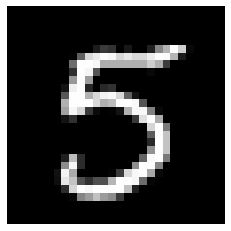

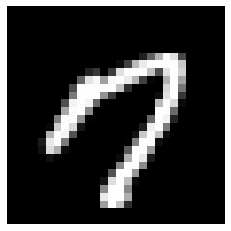

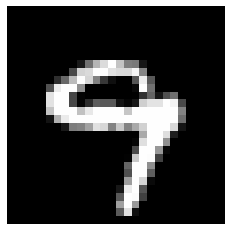

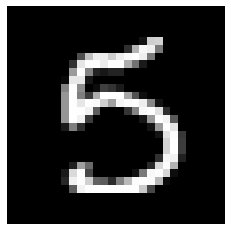

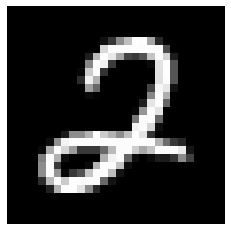

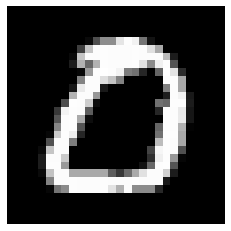

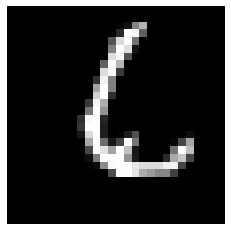

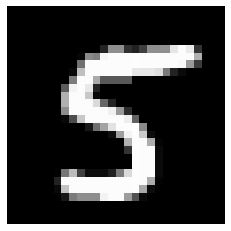

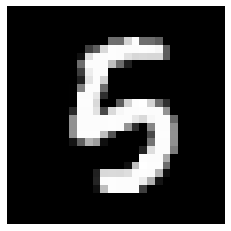

Changing Tuning Parameter'K-neighbors' while using 20 splits fold
-----------------------------------------------------------------
For k=1: Average Precision=0.959358925640859  Average Accuracy=0.9584968322092786
For k=2: Average Precision=0.9504721287720171  Average Accuracy=0.9482820355610055
For k=3: Average Precision=0.9591002002622258  Average Accuracy=0.9577113222971592
For k=4: Average Precision=0.9572210471306578  Average Accuracy=0.9554971387696709
For k=5: Average Precision=0.957243123398127  Average Accuracy=0.9555689760882895
For k=6: Average Precision=0.9556374893054563  Average Accuracy=0.9534974453300633
For k=7: Average Precision=0.954524301058156  Average Accuracy=0.9523542816268138
For k=8: Average Precision=0.9533646436799353  Average Accuracy=0.9509255058246474
For k=9: Average Precision=0.951820511631786  Average Accuracy=0.9492825464949929
For k=10: Average Precision=0.9523674481152777  Average Accuracy=0.9496394849785407
For k=11: Average Precision=0.95179215443

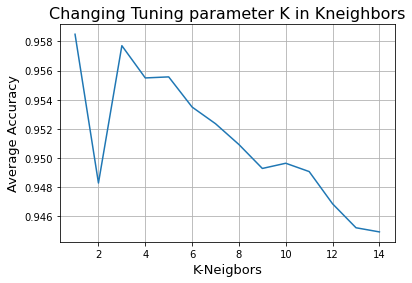

1
-----------------------------------------------------
For Optimim k:1, Final Evaluation Report on test set
Confusion Matrix: [[588   0   0   0   0   2   4   0   0   0]
 [  0 686   2   1   2   0   0   0   0   0]
 [  1   7 590   4   2   1   0  11   1   0]
 [  0   6   8 550   0  12   1   5   8   0]
 [  0   5   2   0 543   0   1   3   2  31]
 [  0   0   0   8   1 471   3   3   3   4]
 [  2   0   0   0   0   2 615   0   1   0]
 [  0   8   3   0   5   0   0 593   0  11]
 [  1   6   5   7   7  10   2   2 534  12]
 [  3   3   1   3   8   0   0  18   1 565]]
Accuracy: 0.9558333333333333
Precision: 0.9549712304431971
Training Time: 0.004250526428222656
Prediction Time: 5.346194505691528


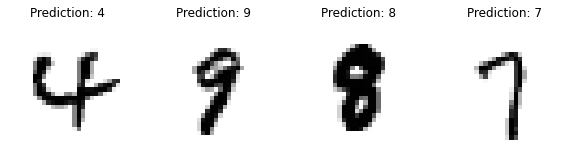

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/IEEE-CIS-GHRCE-62361B/MLBootcamp/master/Week3/mnist_digit.csv")
data = np.array(data)
x = data[:, 1:] #features
y = data[:, 0] #label
#visualising dataset
for i in range(0, 9):
  plt.figure()
  plt.imshow(x[i].reshape(28, 28), cmap='gray')
  plt.axis("off")
  plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#Task one Run your code with different values of neigbors 
best_k=tuning_parameter(x_train,y_train) #Best Accuracy for K_neighbors
print(best_k)
knn_model(x_train,y_train,x_test,y_test,best_k)
